In [1]:
# imports:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest ,f_classif ,VarianceThreshold

from sklearn.model_selection import train_test_split

from sklearn.base import TransformerMixin , BaseEstimator

from sklearn.impute import SimpleImputer

from sklearn import tree

In [2]:
data=pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data.describe(include=["O"])

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [6]:
integar=data.select_dtypes(include=["int64"]).columns
integar

Index(['hypertension', 'heart_disease', 'blood_glucose_level', 'diabetes'], dtype='object')

In [7]:
continous=data.select_dtypes(include=["float64"]).columns
continous

Index(['age', 'bmi', 'HbA1c_level'], dtype='object')

In [8]:
objected=data.select_dtypes("object").columns
objected

Index(['gender', 'smoking_history'], dtype='object')

<Axes: xlabel='gender'>

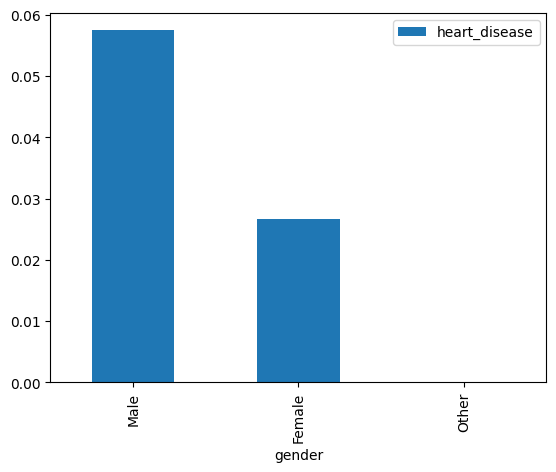

In [9]:
data.groupby(["gender"])["heart_disease"].mean().sort_values(ascending=False).plot(kind="bar",legend=True)

<Axes: xlabel='gender'>

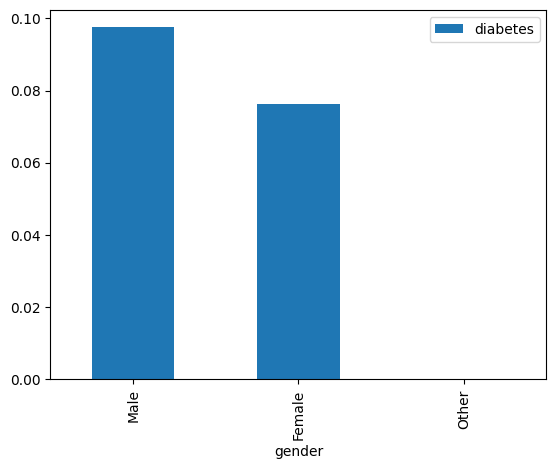

In [10]:
data.groupby(["gender"])["diabetes"].mean().sort_values(ascending=False).plot(kind="bar",legend=True)

<Axes: xlabel='age', ylabel='Density'>

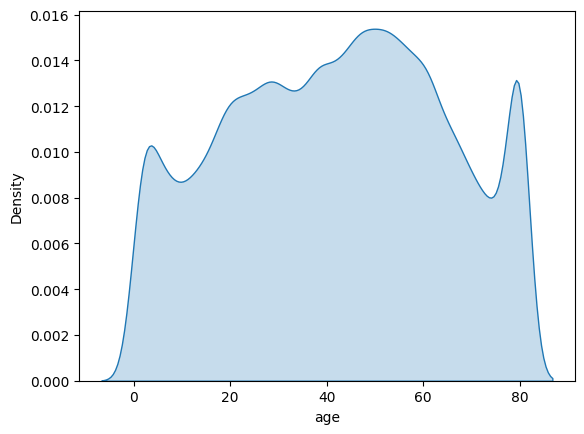

In [13]:
sns.kdeplot(data["age"],fill=True)

<Axes: ylabel='diabetes'>

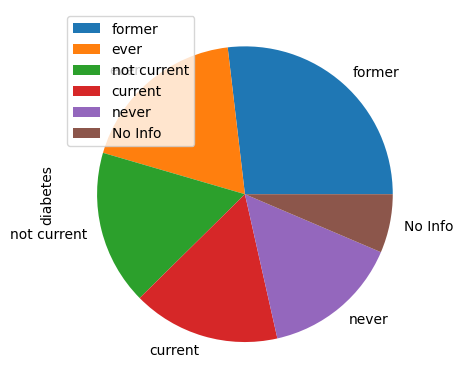

In [14]:
data.groupby(["smoking_history"])["diabetes"].mean().sort_values(ascending=False).plot(kind="pie",legend=True)

<Axes: xlabel='gender'>

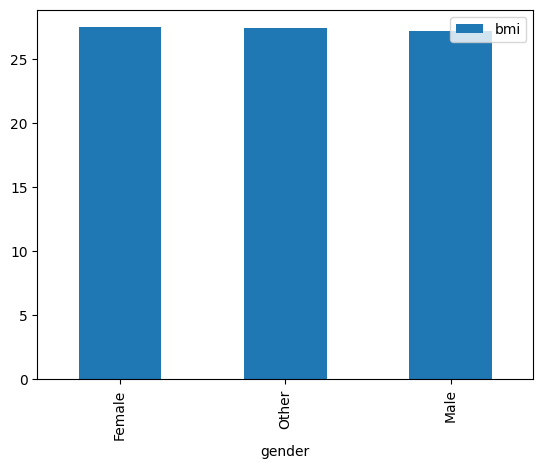

In [15]:
data.groupby(["gender"])["bmi"].mean().sort_values(ascending=False).plot(kind="bar",legend=True)

In [16]:
data["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [17]:
data["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [18]:
data["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

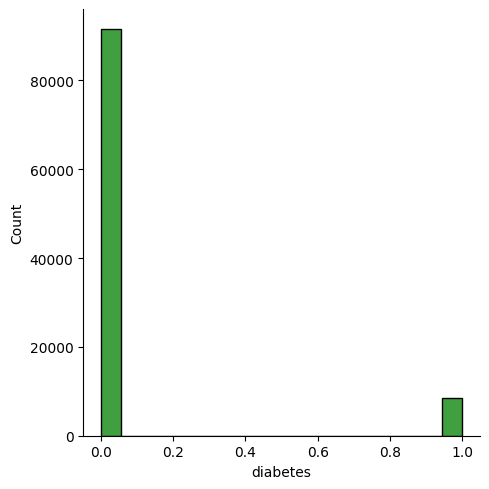

In [20]:
sns.displot(data["diabetes"],color="g")

In [21]:
data.isna().mean()

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [22]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="median")
impute.fit_transform(data["age"].values.reshape(1,-1))

array([[80., 54., 28., ..., 66., 24., 57.]])

In [23]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [24]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='age'>

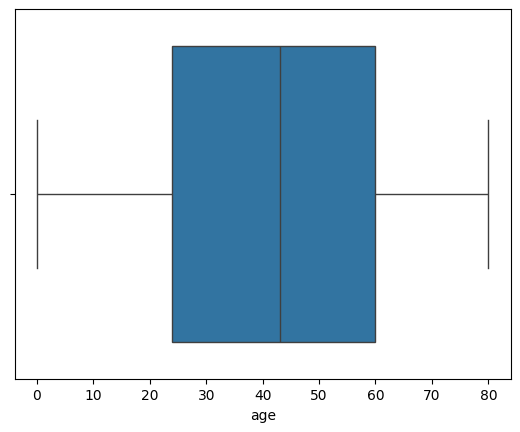

In [25]:
# from pervious statistical step we find that predicted there outlier in blood_glucose_level,age

# 1- age:-

sns.boxplot(x=data["age"])

# ther are Not outlier in Age:-


<Axes: xlabel='age'>

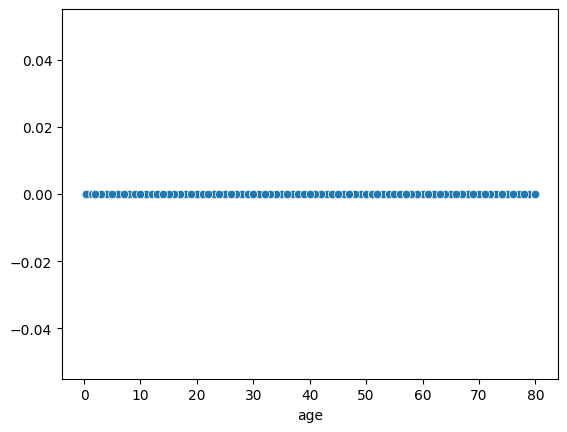

In [26]:
sns.scatterplot(x=data["age"],y=np.zeros_like(data["age"]))

<Axes: xlabel='blood_glucose_level'>

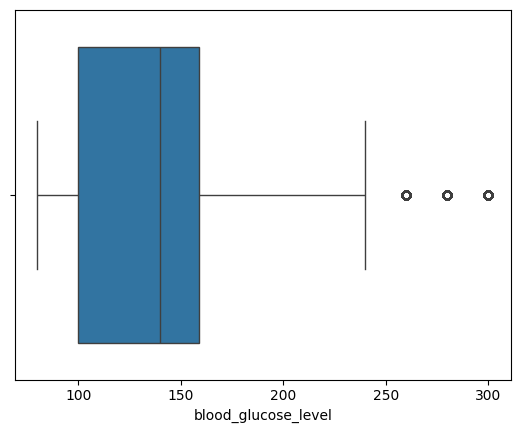

In [27]:
#2- blood_glucose_level:-

sns.boxplot(x=data["blood_glucose_level"])

# ther then outlier

<Axes: xlabel='blood_glucose_level'>

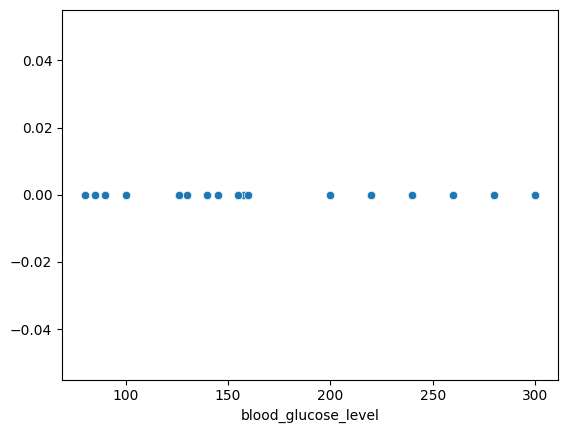

In [28]:
sns.scatterplot(x=data["blood_glucose_level"],y=np.zeros_like(data["blood_glucose_level"]))

In [29]:
# calc the outlier for blood_glucose_level:

Q1,Q3=data["blood_glucose_level"].quantile([0.25,0.75])

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

outlier=[]

for x in data["blood_glucose_level"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)

In [30]:
print("Q1_blood",Q1)
print("Q3_blood",Q3)
print("IQR_blood",IQR)
print("low_limit_blood",low_limit)
print("upper_limit_blood",upper_limit)
print("outliers=",outlier)
print("number outliers value =",len(outlier))

Q1_blood 100.0
Q3_blood 159.0
IQR_blood 59.0
low_limit_blood 11.5
upper_limit_blood 247.5
outliers= [260, 300, 280, 280, 300, 280, 300, 280, 260, 280, 260, 260, 300, 300, 280, 280, 300, 300, 300, 280, 260, 300, 300, 260, 260, 300, 300, 280, 260, 280, 280, 260, 300, 280, 260, 260, 300, 280, 280, 260, 300, 280, 300, 260, 300, 300, 260, 260, 280, 300, 300, 260, 260, 300, 300, 280, 280, 280, 280, 300, 280, 300, 280, 260, 300, 260, 260, 300, 280, 280, 260, 260, 300, 260, 300, 280, 260, 300, 280, 280, 300, 260, 280, 280, 280, 300, 260, 300, 280, 300, 300, 260, 280, 260, 300, 280, 280, 280, 280, 260, 300, 280, 260, 260, 260, 280, 260, 300, 280, 280, 300, 280, 280, 280, 260, 280, 260, 280, 300, 300, 280, 280, 260, 300, 260, 260, 280, 300, 300, 280, 280, 260, 260, 300, 300, 300, 280, 260, 300, 280, 260, 300, 300, 300, 260, 260, 300, 280, 300, 280, 260, 260, 300, 280, 260, 300, 300, 280, 280, 280, 280, 300, 280, 260, 300, 280, 300, 300, 260, 260, 300, 260, 280, 300, 260, 260, 280, 300, 260, 260,

In [31]:
num_cols=data.select_dtypes("number").columns
num_cols

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [32]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices =True)

array([0, 1, 2, 3, 4, 5, 6])

In [33]:
num_cols[selector.get_support(indices =True)]

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [34]:
data.select_dtypes("number").corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [35]:
data.select_dtypes("number").corr(method="pearson")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [36]:
data.select_dtypes("number").corr(method="spearman")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.254197,0.234424,0.351311,0.083634,0.075412,0.262076
hypertension,0.254197,1.000000,0.121262,0.147441,0.066752,0.056369,0.197823
heart_disease,0.234424,0.121262,1.000000,0.069601,0.055188,0.045133,0.171727
bmi,0.351311,0.147441,0.069601,1.000000,0.063368,0.058261,0.200061
HbA1c_level,0.083634,0.066752,0.055188,0.063368,1.000000,0.090891,0.328705
blood_glucose_level,0.075412,0.056369,0.045133,0.058261,0.090891,1.000000,0.274217
diabetes,0.262076,0.197823,0.171727,0.200061,0.328705,0.274217,1.000000


In [37]:
data.select_dtypes("number").corr(method="kendall")

/home/abdalrahman/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.209052,0.192791,0.247000,0.058317,0.052445,0.215532
hypertension,0.209052,1.000000,0.121262,0.123481,0.056567,0.047657,0.197823
heart_disease,0.192791,0.121262,1.000000,0.058291,0.046767,0.038157,0.171727
bmi,0.247000,0.123481,0.058291,1.000000,0.044983,0.041260,0.167550
HbA1c_level,0.058317,0.056567,0.046767,0.044983,1.000000,0.065109,0.278549
blood_glucose_level,0.052445,0.047657,0.038157,0.041260,0.065109,1.000000,0.231834
diabetes,0.215532,0.197823,0.171727,0.167550,0.278549,0.231834,1.000000


Text(0.5, 1.0, 'Matrix-Correlation_Heatmap')

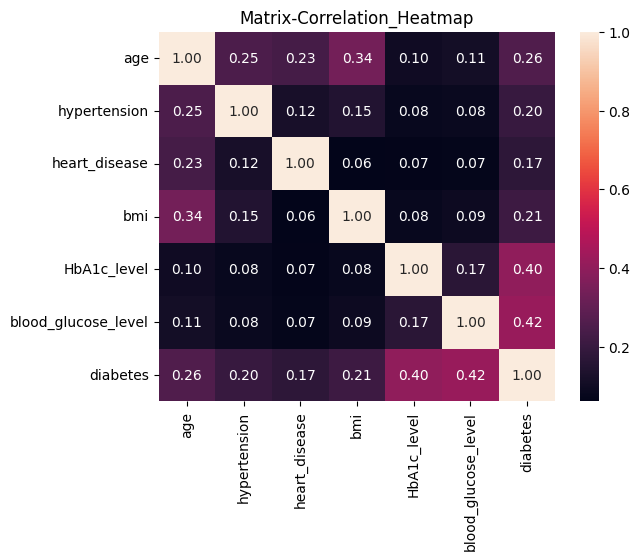

In [38]:
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt=".2f")
plt.title("Matrix-Correlation_Heatmap")

In [39]:
fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="diabetes").select_dtypes("number").fillna(0),data["diabetes"])


SelectKBest(k=5)

In [40]:
print(["{:10f}".format(p)for p in fs.pvalues_])
print(["{:10f}".format(p)for p in fs.scores_])

['  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000']
['7131.405852', '4072.706875', '3038.559564', '4816.113932', '19122.211184', '21363.054361']


In [41]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="diabetes").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([pvalues_features,scores_features,features],axis=1)
feature_score.columns=["pvalues","scores","inputs"]
feature_score

,pvalues,scores,inputs
0,0.0,7131.405852,age
1,0.0,4072.706875,hypertension
2,0.0,3038.559564,heart_disease
3,0.0,4816.113932,bmi
4,0.0,19122.211184,HbA1c_level
5,0.0,21363.054361,blood_glucose_level


In [42]:
data=pd.get_dummies(data,dtype=int)
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [43]:
x=data.drop("diabetes",axis=1)
y=data["diabetes"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)


In [46]:
from sklearn import tree

model=tree.DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
print(f"accuracy={model.score(x_test,y_test)*100:0.2f}%")

accuracy=97.24%


In [48]:
text_represention=tree.export_text(model)
print(text_represention)

|--- feature_4 <= 6.70
|   |--- feature_5 <= 210.00
|   |   |--- feature_0 <= 53.50
|   |   |   |--- feature_3 <= 32.69
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  32.69
|   |   |   |   |--- feature_4 <= 5.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  5.35
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  53.50
|   |   |   |--- feature_4 <= 5.35
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  5.35
|   |   |   |   |--- feature_5 <= 113.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  113.00
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  210.00
|   |   |--- class: 1
|--- feature_4 >  6.70
|   |--- class: 1



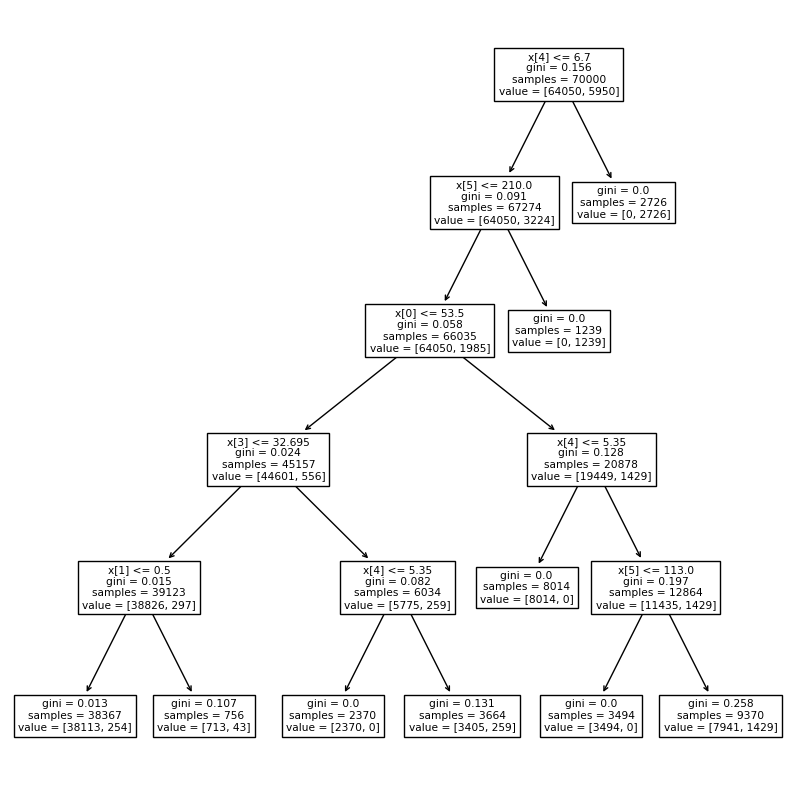

In [49]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,max_depth=5)
plt.show()

In [ ]:
# Here is the End Project